# **AdvDS - Assignment 1: Binary Classification - NBA Player Prediction - Data Preparation**

Build a binary classification model that can predict if a rookie player will last at least 5 years in the NBA

**Student Name:** Nathan Fragar

**Student No. :** 93087548

**Team Name:** Group 1
* Nuwan Munasinghe
* Wenyingwuwy
* Nathan Fragar
* Sean Williams

## 1. Load and Discover Dataset

**[1.1]** TEask: Import required packages: Pandas, Numpy, joblib

In [ ]:
# Task: Import the pandas, numpy and joblib package
import pandas as pd
import numpy as np
import joblib as job

**[1.2]** Task: Identify correct directory

In [ ]:
! ls -l ../data/raw

**[1.3]** Task: Load Test and Train Files into Pandas Data Frames

In [ ]:
# File URLs
file_path_train = "../data/raw/train.csv"
file_path_test= "../data/raw/test.csv"

# Load files into df_training and df_validation data frames
df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

**[1.4]** Task: Display Train and Test Data Frames

In [ ]:
# Task: Display first 5 rows of df_train
df_train.head()

In [ ]:
# Task: Display first 5 rows of df_train
df_test.head()

**Observation:** Both datasets are identical with the exception the Test Dataset does not have the Target Variable. This is to be expected

**[1.5]** Task: Display Train and Test Shape

In [ ]:
# Task: Display shape of df_train
df_train.shape

In [ ]:
# Task: Display shape of df_test
df_test.shape

**[1.6]** Task: Display descriptive statistics for Train and Test Datasets

In [ ]:
# Task: Describe df_train
df_train.describe()

**Observations**

**Outlier - Minimum Values** - Negative for GP, 3P Made, 3PA, FTM, BLK
* GP: -8 games
* 3P Made: -1.1 
* 3PA: -3.1
* FTM: 
* BLK: -17.9

**Outlier - Maximum Values**
* MIN - A max value of 73.8 minutes played per game appears high, particularly with 75% at 23.5 - may have some outlier records
* a NBA Game has 48 minutes per game


In [ ]:
# Task: Describe df_train
df_test.describe()

**Obervations**
* No Negative minimums
* Outlier Maximum Values - MIN - a max value of 68 mins per game appears high
* Mean and Standard Deviation between train and test appear to be reasonably well aligned


**[1.7]** Task: Identify Missing Values

In [ ]:
# Task: Display Summary (Info)
df_train.info()

**Oberservation** 
There are no missing values in this dataset

**[1.8]** Task: Investigate Column Details - Find Min Values for each columns

In [ ]:
df_train.min()

**[1.8.1]** Task: Find Rows where GP (Games Played) is negative

In [ ]:
df_train_mask_GP = df_train['GP'] < 0
df_train_GP_less_zero = df_train[df_train_mask_GP]
print(df_train_GP_less_zero)

**[1.8.2]** Task: Find Rows where 3P Made (3 Points Made) is negative

In [ ]:
# Identify how many rows are positive, negative and zero
#df_train_mask_3PMade = df_train['3P Made'] > 0
#df_train_mask_3PMade = df_train['3P Made'] == 0
df_train_mask_3PMade = df_train['3P Made'] < 0
df_train_3PMade_less_zero = df_train[df_train_mask_3PMade]
print(df_train_3PMade_less_zero[['Id','GP','MIN','3P Made','3PA','3P%']])

**Observed Statistics - Negative Values for 3P Made**
* Negative - 1629 (20.4%)
* Zero - 673 (8.4%)
* Positive - 5698 (71.2%)


**[1.8.3]** Task: Find Rows where 3PA (3 Points Attempted) is negative

In [ ]:
# Identify how many rows are positive, negative and zero
#df_train_mask_3PMade = df_train['3PA'] > 0
#df_train_mask_3PMade = df_train['3PA'] == 0
df_train_mask_3PMade = (df_train['3PA'] > 0)
df_train_3PMade_less_zero = df_train[df_train_mask_3PMade]
print(df_train_3PMade_less_zero[['Id','GP','MIN','3P Made','3PA','3P%']])

**Observated Statistics**
* Negative - 1658 (20.7%)
* Zero - 220 (2.8%)
* Positive - 6342  (76.5%)

**Observation:** The 3 point statistics do not look reliable.

**Proposal:** Remove 3 point statistics from initial analysis

**Notes**
The following columns do not appear to have reliable information, they do not fit the profile of the statistic
* 3P Made - Negative Numbers should not be possible
* 3PA - Points Attempted should always be the same or greater than Points Made
* 3P% - Calculation of % should be (Points Made / Points Attempted) within a certain tolerance of error (due to rounding)
* FTM - Negative Numbers should not be possible
* FTA - Points Attempted should always be the same or greater than Points Made
* FT% 
* BLK  - Negative Numbers should not be possible


## 2. Feature Engineering

No creation of new features at this time.

**[2.1]** Create copy of Training and Test Datasets


In [ ]:
# Create copy of df_train and df_test
df_train_cleaned = df_train
df_test_cleaned = df_test

**[2.2]** Task:Create Training and Test Datasets

Drop Columns: 3P Made,3PA ,3P%, FTM,FTA,FT%, ,BLK

In [ ]:
# Drop Columns for Train and Test Datasets
df_train_cleaned = df_train_cleaned.drop(['3P Made','3PA','3P%','FTM','FTA','FT%','BLK'],axis=1)
df_test_cleaned = df_test_cleaned.drop(['3P Made','3PA','3P%','FTM','FTA','FT%','BLK'],axis=1)

Task: Display df_train_cleaned Information

In [ ]:
# Display df_train_cleaned information
df_train_cleaned.info()

In [ ]:
df_test_cleaned.info()

**[2.3]** Task: Import and Normalise all statistic columns

In [ ]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate Scaler
scaler = MinMaxScaler()

In [ ]:
# Create df_train_cleaned_scaled_cols with columns to be scaled 
df_train_cleaned_scaled_cols = df_train_cleaned[['GP','MIN','PTS','FGM','FGA','FG%','OREB','DREB','REB','AST','STL','TOV']]
df_test_cleaned_scaled_cols = df_test_cleaned[['GP','MIN','PTS','FGM','FGA','FG%','OREB','DREB','REB','AST','STL','TOV']]
df_train_cleaned_scaled_cols.head()

In [ ]:
# Scale Columns
df_train_cleaned_scaled = scaler.fit_transform(df_train_cleaned_scaled_cols)
df_test_cleaned_scaled = scaler.fit_transform(df_test_cleaned_scaled_cols)

In [ ]:
# Convert numpy arrany df_train_cleaned_scaled values back to df_train_cleaned_scaled data frame 
df_train_cleaned_scaled = pd.DataFrame(np.squeeze(df_train_cleaned_scaled), columns=df_train_cleaned_scaled_cols.columns) 
df_test_cleaned_scaled = pd.DataFrame(np.squeeze(df_test_cleaned_scaled), columns=df_test_cleaned_scaled_cols.columns) 

In [ ]:
df_train_cleaned_scaled.describe()

In [ ]:
df_train_cleaned.describe()

In [ ]:
df_train_cleaned = df_train_cleaned.drop(['GP','MIN','PTS','FGM','FGA','FG%','OREB','DREB','REB','AST','STL','TOV'],axis=1)
df_test_cleaned = df_test_cleaned.drop(['GP','MIN','PTS','FGM','FGA','FG%','OREB','DREB','REB','AST','STL','TOV'],axis=1)

In [ ]:
df_train_cleaned = pd.concat([df_train_cleaned, df_train_cleaned_scaled], axis=1)
df_test_cleaned = pd.concat([df_test_cleaned, df_test_cleaned_scaled], axis=1)

In [ ]:
df_train_cleaned.head(10)

In [ ]:
df_test_cleaned.head(10)

In [ ]:
df_train_cleaned.shape

In [ ]:
df_test_cleaned.shape

In [ ]:
df_train_cleaned.describe()

In [ ]:
df_test_cleaned.describe()

**[2.4]** Task: Create Train and Validate Datasets

In [ ]:
# Drop Target and ID for X, and create target from y
df_train_id = df_train_cleaned['Id']
X = df_train_cleaned.drop(['Id', 'TARGET_5Yrs'], axis=1)
y = df_train_cleaned['TARGET_5Yrs']

In [ ]:
X.info()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the data in training and remaining dataset. 80:10:10 for train:valid:test
X_train, X_validate, y_train, y_validate  = train_test_split(X, y, train_size=0.8, shuffle = True, stratify=y, random_state = 8)

Task: Check train and validate datasets have been distributed well

In [ ]:
y.value_counts(normalize=True)

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_validate.value_counts(normalize=True)

## 3. Create Baseline Model

**[3.1]** Task: Find the mode of the target variable and print it's value

In [ ]:
y_mode = y_train.mode()
y_mode

**[3.2]** Task: Create a numpy array called y_base filled with this value

In [ ]:
y_shape = (len(y_train), 1)
y_base = np.full(y_shape, y_mode)

**[3.3]** Task: Import the accuracy score from sklearn

In [ ]:
from sklearn.metrics import accuracy_score

**[3.4]** Task: Display the accuracy score of this baseline model

In [ ]:
accuracy_score(y_train, y_base)

The null accuracty is 83.35%
If we predict 1, we'll be correct 83.35% of the time

## 4. Random Forest - Hyperparameter Tuning with Grid Search and KFold

Train Random Forest Algorithm

1.   Use Grid Search to tune Hyper Parameters
2.   Use KFold with 5 Splits
3.   Fit Algorithm

**[4.1]** Task: Import GridSearchCV, KFold from sklearn.model_selection

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold

**[4.2]** Create a dictionary containing the Randomized Grid Search Parameters

In [385]:
# Number of trees in random forest
n_estimators = np.linspace(50, 500, int((2000-100)/400) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 100]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [387]:
random_grid

{'n_estimators': array([ 50, 162, 275, 387, 500]),
 'max_depth': [1, 5, 10, 20, 50, 100],
 'min_samples_split': [1, 2, 5, 10, 15, 20],
 'min_samples_leaf': [2, 5, 8],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

**[4.3]** Task: Create RF Model, and use Randomized Search to find GridSearch range

In [388]:
 from sklearn.ensemble import RandomForestClassifier

In [389]:
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, 
                               cv = 5,
                               verbose=2,
                               random_state=8, 
                               n_jobs = 4)

**[4.4]** Train Model

In [384]:
## Import up sound alert dependencies
from IPython.display import Audio, display

In [380]:
# Define a function to beep when done.
def allDone():
    display(Audio(url='https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg', autoplay=True))
    return

In [390]:
rf_random.fit(X_train, y_train)

# Beep when completed
allDone()

print(rf_random.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", 

{'n_estimators': 275, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 100, 'criterion': 'gini', 'bootstrap': True}


*print(rf_random.best_params_)*

{'n_estimators': 275, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 100, 'criterion': 'gini', 'bootstrap': True}

In [393]:
rf_best = RandomForestClassifier(random_state=8, n_estimators=275, max_depth=100, min_samples_leaf=8, max_features=None).fit(X_train, y_train)

In [464]:
print("--- Accuracy Scores Best Fit Model ---")
print("Baseline: ",accuracy_score(y_train, y_base))
print("Train:    ",rf_best.score(X_train, y_train))
print("Validate: ",rf_best.score(X_validate, y_validate))

--- Accuracy Scores Best Fit Model ---
Baseline:  0.83359375
Train:     0.8675
Validate:  0.8275


**Observation** Training Model is overfitting

**[4.5]** Tune Hyperparameters to better reduce overfitting.

1. Reduce Depth to 50

In [513]:
rf_best_1 = RandomForestClassifier(random_state=8, n_estimators=100, max_depth=10, min_samples_leaf=10, max_features=None, class_weight=None).fit(X_train, y_train)

In [514]:
print("--- Accuracy Scores Best Fit Model ---")
print("Baseline: ",accuracy_score(y_train, y_base))
print("Train:    ",rf_best_1.score(X_train, y_train))
print("Validate: ",rf_best_1.score(X_validate, y_validate))

--- Accuracy Scores Best Fit Model ---
Baseline:  0.83359375
Train:     0.85703125
Validate:  0.8275


In [487]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


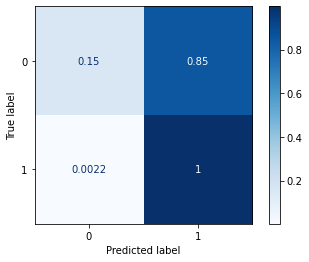

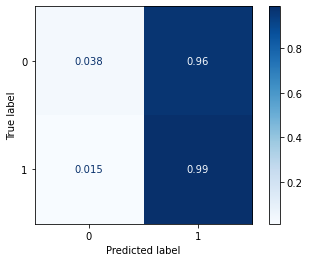

In [515]:
plot_confusion_matrix(rf_best_1, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
plot_confusion_matrix(rf_best_1, X_validate, y_validate, cmap=plt.cm.Blues, normalize='true')

Calculate AUROC

In [509]:
from sklearn.metrics import roc_auc_score

In [510]:
rf_best_1_X_train_proba = rf_best_1.predict_proba(X_train)[:, 1]
rf_best_1_X_validate_proba = rf_best_1.predict_proba(X_validate)[:, 1]
print("rf_best_1_proba:", rf_best_1_X_train_proba)

rf_best_1_proba: [0.88705378 0.4699647  0.85968869 ... 0.83058625 0.69707417 0.92845285]


In [511]:
roc_auc_score(y_train, rf_best_1_X_train_proba)

0.9059804374513247

In [512]:
roc_auc_score(y_validate, rf_best_1_X_validate_proba)

0.6669719651452469

## 5. Random Forest - Kaggle Competition Preparation

Prepare Kaggle Input File using rf_best Random Forest Model

In [519]:
# Drop Target and ID for X, and create target from y
df_test_id = df_test_cleaned['Id']
X_test = df_test_cleaned.drop(['Id'], axis=1)

In [523]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GP      3799 non-null   float64
 1   MIN     3799 non-null   float64
 2   PTS     3799 non-null   float64
 3   FGM     3799 non-null   float64
 4   FGA     3799 non-null   float64
 5   FG%     3799 non-null   float64
 6   OREB    3799 non-null   float64
 7   DREB    3799 non-null   float64
 8   REB     3799 non-null   float64
 9   AST     3799 non-null   float64
 10  STL     3799 non-null   float64
 11  TOV     3799 non-null   float64
dtypes: float64(12)
memory usage: 356.3 KB


In [531]:
y_predict = rf_best_1.predict(X_test)

In [532]:
print(y_predict)

[1 1 1 ... 1 1 1]


In [534]:
# Convert numpy arrany df_train_cleaned_scaled values back to df_train_cleaned_scaled data frame 
y_predict = pd.DataFrame(np.squeeze(y_predict), columns=['TARGET_5Yrs']) 

In [537]:
y_predict = pd.concat([df_test_id, y_predict], axis=1)

In [550]:
y_predict = y_predict.sort_values(by=['Id'])

In [551]:
joblib.dump(rf_best_1, "../models/nfragar_20220212_random_forest_v1.joblib", compress=3)
y_predict.to_csv("../data/external/submission_nfragar_20220212_random_forest_v1.csv", index = False)
y_predict.shape

(3799, 2)